# (1.0) Установка пакетов

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# (1.1) Список датафреймов

X1 - исходный датафрейм  
X1_N - датафрейм с нормированными переменными  
X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных  
X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными  
X1_N_WITH_RATINGS - датафрейм с нормированными переменными, где не были удалены рейтинги

# (1.1) Загрузка данных

In [2]:
X1 = pd.read_csv('ML.csv', sep=";")
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TRNF-3.19,FORTS,238 944


# (1.2) Удаление лишних переменных

In [3]:
# удаляем указание инструмента
X1 = X1.drop(['IDENT','SHORTNAME'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,CROSSVALUE,AVGLIFETIME,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,1732440.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,4.0,238 944


In [4]:
# удаляем лишние переменные
X1 = X1.drop(['DETECTION_ID','EVENT_ID','SIGNAL_ID'], axis=1)
X1.head(1)

,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,RATINGPROFITPL,...,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,0.0,...,0.0,1732440.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,4.0


In [5]:
# ищем переменные с нулевой вариацией
for col in list(X1.columns):
        print(col, X1[col].unique())
        print()

TRADEDATE ['03.18.2019 15:01:21' '03.19.2019 10:00:07' '03.07.2019 16:31' ...
 '01.22.2019 21:10:08' '10.31.2018 16:03:07' '10.26.2018 14:26:38']

CROSSTURNOVER1 [1.]

CROSSDEALRATIOS [ 24.   3.   2.   4.   6.   1.  18.  40.  15.   5.   8.  59.   9.   7.
  23.  19. 100.  17.  16.  10.  11.  22.  12.  13.   0.  57.  14.  50.
  67.  28.  95.  31.  33.  21.  20.  41.  92.  74.  73.  25.  45.  29.
  36.  26.  51.  60.  52.  43.  30.  69.  77.  34.  75.  53.  37.  38.
  44.  32.  65.  27.  35.  89.  80.  46.  86.  42.  87.  47.  71.  70.
  66.  99.  79.  48.  63.  62.  84.  98.  72.  76.  49.  55.  97. 200.
  88.  56.  82.  93.  54. 115.  39.  90.  78.  91.  81.  58.  94.  96.
  68.  61.]

EPSILONE [0.]

PROFITPL [ 2290.  8909.   788. ... 43622. 23929.  4300.]

PROFITABILITYY [  1.   0.   4.   2.  11.   3.  49.  18.   5.  24.  12.  13.  15.   6.
  20.  16.   8.   9.  14.   7.  26.  32.  30.  22.  10.  76.  37.  17.
  43.  21.  29.  28.  41.  25.  19.  27.  36.  45.  35.  23.  50.  63.
  48.

In [5]:
# удаляем переменные с нулевой вариацией
X1 = X1.drop(['CROSSTURNOVER1','EPSILONE','AGTDEV_BS','AVGLIFETIME',
             'RATINGEPSILONE','RATINGAVGLIFETIME', 'RATINGAGTDEVPRICE',
              'RATINGAGTDEVVOL','RATINGCROSSTURNOVER1','RATINGCROSSTURNOVER2',
              'RATINGCROSSVALUE'], axis=1)
X1.head(1)

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGPROFITPL,RATINGPROFITABILITYY,RATINGSIGNALSK,RATINGINTEGRAL,AGTDEV_PRICE,AGTDEV_VOL,RATINGDEV,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,24.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0


# (1.3) Преобразование переменных

In [6]:
# преобразуем объект в datetime и считаем длительность сигнала
X1['TRADEDATE_LAST'] = pd.to_datetime(pd.Series(X1['TRADEDATE_LAST']))
X1['TRADEDATE'] = pd.to_datetime(pd.Series(X1['TRADEDATE']))
X1['DELTA'] = X1['TRADEDATE_LAST']- X1['TRADEDATE']
X1 = X1.drop(['TRADEDATE_LAST','TRADEDATE'], axis=1)
X1['DELTA'] = [(X1.loc[i,'DELTA'].seconds) for i in range(len(X1.DELTA))]
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGPROFITPL,RATINGPROFITABILITYY,RATINGSIGNALSK,RATINGINTEGRAL,AGTDEV_PRICE,AGTDEV_VOL,RATINGDEV,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,DELTA
0,24.0,2290.0,1.0,3.0,24.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1732440.0,4.0,3087


In [7]:
# создаем бинарную переменную на основании USERGRADE_ID (0 - шум, 1 - не шум)
# все, что имеет USERGRADE_ID 2 и 3, превращаем в NOISE = 0 Все, что имеет USERGRADE_ID 4, превращаем в NOISE = 1
X1['NOT_NOISE'] = np.where((X1.USERGRADE_ID == 2) | (X1.USERGRADE_ID == 3), 1, 0)
X1 = X1.drop(['USERGRADE_ID'], axis=1)
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGPROFITPL,RATINGPROFITABILITYY,RATINGSIGNALSK,RATINGINTEGRAL,AGTDEV_PRICE,AGTDEV_VOL,RATINGDEV,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,24.0,2290.0,1.0,3.0,24.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1732440.0,3087,0


Нормируем переменные в соответствии со следующим преобразованием:   
$$\\F_i = \frac{f_i - \overline{f}} {St.dev(f)}$$

In [8]:
# создаем новый датафрейм с нормированными переменными
X1_N = pd.DataFrame()
X1_N['CROSSDEALRATIOS'] = [(X1.loc[i,'CROSSDEALRATIOS'] - X1['CROSSDEALRATIOS'].mean())/X1['CROSSDEALRATIOS'].std() for i in range(len(X1.CROSSDEALRATIOS))]
X1_N['PROFITPL'] = [(X1.loc[i,'PROFITPL'] - X1['PROFITPL'].mean())/X1['PROFITPL'].std() for i in range(len(X1.PROFITPL))]
X1_N['PROFITABILITYY'] = [(X1.loc[i,'PROFITABILITYY'] - X1['PROFITABILITYY'].mean())/X1['PROFITABILITYY'].std() for i in range(len(X1.PROFITABILITYY))]
X1_N['SIGNALSK'] = [(X1.loc[i,'SIGNALSK'] - X1['SIGNALSK'].mean())/X1['SIGNALSK'].std() for i in range(len(X1.SIGNALSK))]
X1_N['AGTDEV_PRICE'] = [(X1.loc[i,'AGTDEV_PRICE'] - X1['AGTDEV_PRICE'].mean())/X1['AGTDEV_PRICE'].std() for i in range(len(X1.AGTDEV_PRICE))]
X1_N['AGTDEV_VOL'] = [(X1.loc[i,'AGTDEV_VOL'] - X1['AGTDEV_VOL'].mean())/X1['AGTDEV_VOL'].std() for i in range(len(X1.AGTDEV_VOL))]
X1_N['CROSSTURNOVER2'] = [(X1.loc[i,'CROSSTURNOVER2'] - X1['CROSSTURNOVER2'].mean())/X1['CROSSTURNOVER2'].std() for i in range(len(X1.CROSSTURNOVER2))]
X1_N['CROSSVALUE'] = [(X1.loc[i,'CROSSVALUE'] - X1['CROSSVALUE'].mean())/X1['CROSSVALUE'].std() for i in range(len(X1.CROSSVALUE))]
X1_N['DELTA'] = [(X1.loc[i,'DELTA'] - X1['DELTA'].mean())/X1['DELTA'].std() for i in range(len(X1.DELTA))]
X1_N['NOT_NOISE'] = X1['NOT_NOISE']
X1_N['RATINGCROSSDEALRATIOS'] = [(X1.loc[i,'RATINGCROSSDEALRATIOS'] - X1['RATINGCROSSDEALRATIOS'].mean())/X1['RATINGCROSSDEALRATIOS'].std() for i in range(len(X1.RATINGCROSSDEALRATIOS))]
X1_N['RATINGPROFITPL'] = [(X1.loc[i,'RATINGPROFITPL'] - X1['RATINGPROFITPL'].mean())/X1['RATINGPROFITPL'].std() for i in range(len(X1.RATINGPROFITPL))]
X1_N['RATINGPROFITABILITYY'] = [(X1.loc[i,'RATINGPROFITABILITYY'] - X1['RATINGPROFITABILITYY'].mean())/X1['RATINGPROFITABILITYY'].std() for i in range(len(X1.RATINGPROFITABILITYY))]
X1_N['RATINGSIGNALSK'] = [(X1.loc[i,'RATINGSIGNALSK'] - X1['RATINGSIGNALSK'].mean())/X1['RATINGSIGNALSK'].std() for i in range(len(X1.RATINGSIGNALSK))]
X1_N['RATINGINTEGRAL'] = [(X1.loc[i,'RATINGINTEGRAL'] - X1['RATINGINTEGRAL'].mean())/X1['RATINGINTEGRAL'].std() for i in range(len(X1.RATINGINTEGRAL))]
X1_N.head(5)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE,RATINGCROSSDEALRATIOS,RATINGPROFITPL,RATINGPROFITABILITYY,RATINGSIGNALSK,RATINGINTEGRAL
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.056744,-0.710139,0,0.448633,-0.018284,-0.380163,-0.513618,-0.858281
1,-0.473516,-0.016409,-0.368477,-0.512488,-1.15257,-1.14048,-0.290189,0.185901,3.524390,0,-0.473516,-0.018284,-0.380163,-0.513618,-1.196204
2,-0.517427,-0.020362,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.092792,1.066029,0,-0.517427,-0.018284,-0.380163,-0.513618,-1.196204
3,-0.473516,-0.020132,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.072149,2.874730,0,-0.473516,-0.018284,-0.380163,-0.513618,-1.196204
4,-0.429604,-0.019093,-0.385397,-0.512488,-1.15257,-1.14048,-0.290189,0.338598,-0.984827,1,-0.429604,-0.018284,-0.380163,-0.513618,-1.111723


In [9]:
# удаляем рейтинги
X1_N_WITH_RATINGS = X1_N
X1_N = X1_N.drop(['RATINGCROSSDEALRATIOS','RATINGPROFITPL','RATINGPROFITABILITYY','RATINGSIGNALSK','RATINGINTEGRAL'], axis=1)
X1_N.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.056744,-0.710139,0


# (1.4) Корреляционная матрица

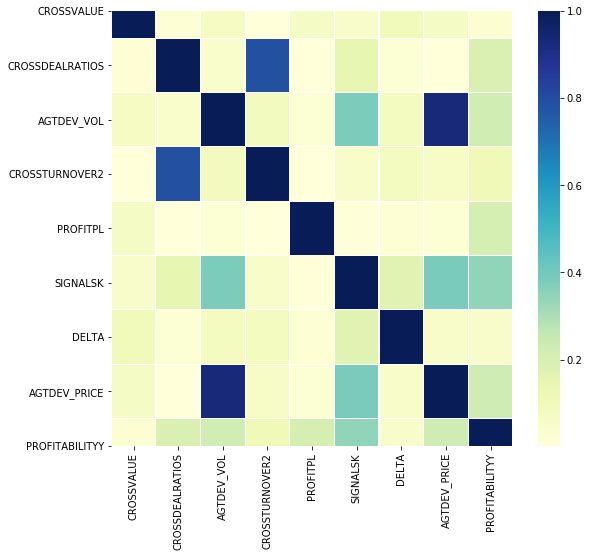

In [11]:
# Create correlation matrix
corr_matrix = X1_N[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'AGTDEV_PRICE','AGTDEV_VOL','CROSSTURNOVER2','CROSSVALUE','DELTA'}].corr().abs()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [13]:
# создаем новый датафрейм (удаляем по одной из переменных из каждой скоррелированной пары):
# X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными
X1_N_COR = X1_N
X1_N_COR = X1_N_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2'], axis=1)
X1_N_COR.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,CROSSVALUE,DELTA,NOT_NOISE
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-0.056744,-0.710139,0


# (1.5) Метод главных компонент

In [14]:
# создаем новую переменную с помощью метода главных компонент на основании скоррелированных переменных
# создаем список на основании скоррелированных переменных
x = X1_N.AGTDEV_VOL.values
y = X1_N.AGTDEV_PRICE.values
a = X1_N.CROSSTURNOVER2.values
b = X1_N.CROSSDEALRATIOS.values

xy = np.vstack((x,y))
ab = np.vstack((a,b))
# создаем компонену на основании скоррелированных переменных
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced1 = pca.fit_transform(np.transpose(xy))
XPCAreduced2 = pca.fit_transform(np.transpose(ab))

In [15]:
# создаем новый датафрейм:
# X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_N_PCA = X1_N
X1_N_PCA['AGTDEV'] = XPCAreduced1
X1_N_PCA['CROSS'] = XPCAreduced2
X1_N_PCA = X1_N_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE','CROSSDEALRATIOS'], axis=1)
X1_N = X1_N.drop(['AGTDEV','CROSS'], axis=1)

KeyError: "['AGTDEV' 'CROSS'] not found in axis"

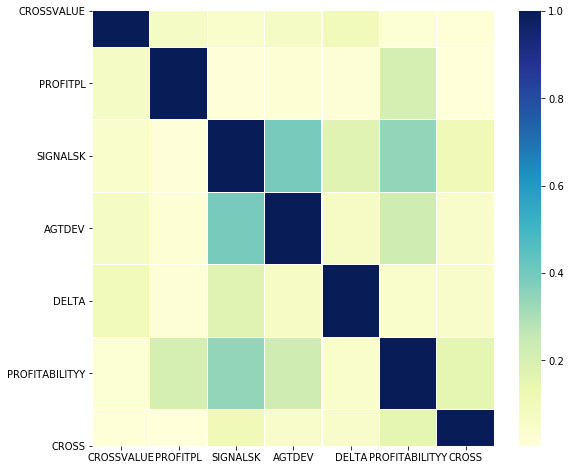

In [19]:
# Create correlation matrix
corr_matrix = X1_N_PCA[{'PROFITPL','PROFITABILITYY','SIGNALSK',
    'CROSSVALUE','DELTA','AGTDEV','CROSS'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# (1.6) Делим выборку на train и test

In [24]:
# выделяем NOT_NOISE в отдельный датафрейм и удаляем из исходного
y1_n = pd.DataFrame(X1_N['NOT_NOISE'], columns=['NOT_NOISE'])
X1_N = X1_N.drop(['NOT_NOISE'], axis=1)
X1_N_PCA = X1_N_PCA.drop(['NOT_NOISE'], axis=1)
X1_N_COR = X1_N_COR.drop(['NOT_NOISE'], axis=1)
X1_N_WITH_RATINGS = X1_N_WITH_RATINGS.drop(['NOT_NOISE'], axis=1)

In [25]:
# создаем из всех датафреймов тренировочную и тестовую выборку
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(X1_N, y1_n, test_size=0.30, random_state = 123)
x_n_pca_train, x_n_pca_test, y_n_train, y_n_test = train_test_split(X1_N_PCA, y1_n, test_size=0.30, random_state = 123)
x_n_cor_train, x_n_cor_test, y_n_train, y_n_test = train_test_split(X1_N_COR, y1_n, test_size=0.30, random_state = 123)
x_n_with_ratings, x_n_with_ratings, y_n_train, y_n_test = train_test_split(X1_N_WITH_RATINGS, y1_n, test_size=0.30, random_state = 123)

# (1.7) Logit

In [20]:
from sklearn import linear_model as slm, datasets, preprocessing
logit = slm.LogisticRegressionCV()
roc_auc_log_train = []
roc_auc_log_test = []

### X1_N

In [22]:
# логит нельзя считать в лоб на данных, где между переменными есть корреляция, поэтому можно использовать специальную надстройку BaggingClassifier

roc_auc_log_test.append('-')
roc_auc_log_train.append('-')

### X1_N_PCA

In [23]:
%%time
# перебор параметров
parameters = {'fit_intercept': [True, False],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'fit_intercept': [True], 
              'solver': ['saga']}'''

logit_best = GridSearchCV(logit, parameters, cv = 5, verbose = 1, n_jobs=-1)
logit_best.fit(x_n_pca_train, y_n_train)
predicted_prob = logit_best.predict_proba(x_n_pca_test)
roc_auc_train = metrics.roc_auc_score(y_n_train, logit_best.predict(x_n_pca_train))
roc_auc_test = metrics.roc_auc_score(y_n_test, logit_best.predict(x_n_pca_test))
roc_auc_log_train.append(roc_auc_train)
roc_auc_log_test.append(roc_auc_test)
print(roc_auc_train)
print(roc_auc_test)
print(logit_best.best_params_)

predicted_results = []
for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
x1_log = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))

# записываем вероятность попадания в класс 1 в новый датафрейм
x1_log = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_log = x1_log.rename(columns = {0:'PROB_N_PCA_LOG_CV'})

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.8s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ekater

0.5942829387637619
0.5927587959433548
{'fit_intercept': True, 'solver': 'saga'}
CPU times: user 2.17 s, sys: 104 ms, total: 2.27 s
Wall time: 22.3 s


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### X1_N_COR

In [24]:
%%time
parameters = {'fit_intercept': [True, False],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'fit_intercept': [True], 
              'solver': ['newton-cg']}'''

logit_best = GridSearchCV(logit, parameters, cv = 5, verbose = 1, n_jobs=-1)
logit_best.fit(x_n_cor_train, y_n_train)
predicted_prob = logit_best.predict_proba(x_n_cor_test)
roc_auc_train = metrics.roc_auc_score(y_n_train, logit_best.predict(x_n_cor_train))
roc_auc_test = metrics.roc_auc_score(y_n_test, logit_best.predict(x_n_cor_test))
roc_auc_log_train.append(roc_auc_train)
roc_auc_log_test.append(roc_auc_test)
print(roc_auc_train)
print(roc_auc_test)
print(logit_best.best_params_)
predicted_results = []
for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_log_cor = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_log_cor = x1_log_cor.rename(columns = {0:'PROB_N_COR_LOG_CV'})

x1_log = pd.merge(x1_log, x1_log_cor, how='left', left_index=True, right_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.2s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:31

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

0.6505720659135066
0.6765079585094832
{'fit_intercept': True, 'solver': 'newton-cg'}
CPU times: user 12.1 s, sys: 414 ms, total: 12.5 s
Wall time: 1min 6s


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466:

### X1_N_WITH_RATINGS

In [25]:
# логит нельзя считать в лоб на данных, где между переменными есть корреляция, поэтому можно использовать специальную надстройку BaggingClassifier

roc_auc_log_test.append('-')
roc_auc_log_train.append('-')

### Собираем результаты

In [31]:
roc_auc_log1 = pd.DataFrame(roc_auc_log_test, index=['X1_N','X1_N_PCA','X1_N_COR','X1_N_WITH_RATINGS'])
roc_auc_log1 = roc_auc_log1.rename(columns = {0:'LOGIT_TEST'})
roc_auc_log2 = pd.DataFrame(roc_auc_log_train, index=['X1_N','X1_N_PCA','X1_N_COR','X1_N_WITH_RATINGS'])
roc_auc_log2 = roc_auc_log2.rename(columns = {0:'LOGIT_TRAIN'})
roc_auc_log1 = pd.merge(roc_auc_log1, roc_auc_log2, how='left', left_index=True, right_index=True)
roc_auc_log1

,LOGIT_TEST,LOGIT_TRAIN
X1_N,-,-
X1_N_PCA,0.592759,0.594283
X1_N_COR,0.676508,0.650572
X1_N_WITH_RATINGS,-,-


# (1.8) Random Forest

In [87]:
forest = RandomForestClassifier()
roc_auc_train = []
roc_auc_test = []

### X1_N

In [ ]:
%%time
# перебор параметров для определения параметров лучшей модели, которая будет использоваться дальше
parameters = {'n_estimators': [25,50,75,100,125,150], ## максиммум 150
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': [7], # общее количество переменных - 2, чтобы минимизировать попадания в один расчет скоррелированных переменных
              'min_samples_split': [2],
              'min_samples_leaf': [5, 10, 15, 20],
              'bootstrap': [True, False]
             }

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_train, y_n_train)
print(metrics.roc_auc_score(y_n_train, forest_best.predict(x_n_train)))
print(metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_test)))
print(forest_best.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [53]:
# создаем модель на основании найденных параметров лучшей модели
forest1 = RandomForestClassifier(n_estimators = 50,
                                 bootstrap = True,
                                 max_depth = 20,
                                 max_features = 7,
                                 min_samples_leaf = 5,
                                 min_samples_split = 2,
                                 verbose = 1)
forest1.fit(x_n_train, y_n_train)
roc_auc_train = metrics.roc_auc_score(y_n_train, forest1.predict(x_n_train))
roc_auc_test = metrics.roc_auc_score(y_n_test, forest1.predict(x_n_test))
predicted_prob = forest1.predict_proba(x_n_test)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


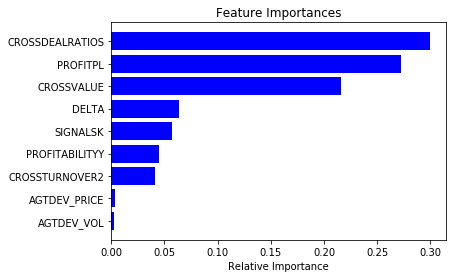

In [61]:
# строим диаграмму с коэффициентами степени важности каждого параметра
features = X1_N.columns.to_list()
indices = np.argsort(importances)
importances = forest1.feature_importances_

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [84]:
# строим дерево решений
col = features
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
str_tree = export_graphviz(forest1.estimators_[1],out_file='tree.dot',
                feature_names=col,
                filled=True,
                rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [ ]:
# записываем результаты работы модели
roc_auc_train.append(roc_auc_train)
roc_auc_test.append(roc_auc_test)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
x1_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf = x1_rf.rename(columns = {0:'PROB_N_RF'})

### X1_N_PCA

In [31]:
%%time
# перебор параметров для определения параметров лучшей модели, которая будет использоваться дальше
parameters = {'n_estimators': [25,50,75,100,125,150], ## максиммум 150
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': [7], # общее количество переменных - 2, чтобы минимизировать попадания в один расчет скоррелированных переменных
              'min_samples_split': [2],
              'min_samples_leaf': [1, 3, 5, 10, 15, 20],
              'bootstrap': [True, False]
             }

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_pca_train, y_n_train)
print(metrics.roc_auc_score(y_n_train, forest_best.predict(x_n_pca_train)))
print(metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_pca_test)))
print(forest_best.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1256 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.8min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8610707346909405
0.7536904844410561
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 75}
CPU times: user 9.03 s, sys: 649 ms, total: 9.68 s
Wall time: 3min 47s


"\nroc_auc_rf.append(roc_auc)\n\npredicted_results = []\n\nfor a in range(len(predicted_prob)):\n    \n    predicted_results.append(predicted_prob[a][1])\n    \nindex_list = x_n_pca_test.index.tolist()\n# записываем вероятность попадания в класс 1 в новый датафрейм\nx1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))\nx1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_PCA_RF_CV'})\n# сливаем с предыдущим результатом\nx1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)"

In [ ]:
# создаем модель на основании найденных параметров лучшей модели
forest1 = RandomForestClassifier(n_estimators = 75,
                                 bootstrap = False,
                                 max_depth = 20,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 5,
                                 min_samples_split = 2,
                                 verbose = 1)
forest1.fit(x_n_train, y_n_train)
roc_auc_train = metrics.roc_auc_score(y_n_train, forest1.predict(x_n_pca_train))
roc_auc_test = metrics.roc_auc_score(y_n_test, forest1.predict(x_n_pca_test))
predicted_prob = forest1.predict_proba(x_n_pca_test)

In [ ]:
# строим диаграмму с коэффициентами степени важности каждого параметра
features = X1_N_PCA.columns.to_list()
indices = np.argsort(importances)
importances = forest1.feature_importances_

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# записываем результаты работы модели
roc_auc_train.append(roc_auc_train)
roc_auc_test.append(roc_auc_test)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
x1_rf1 = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf1 = x1_rf1.rename(columns = {0:'PROB_N_PCA_RF'})
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

### X1_N_COR

In [32]:
%%time
# перебор параметров
parameters = {'n_estimators': [25,50,75,100,125,150], ## максиммум 150
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'], # общее количество переменных - 2, чтобы минимизировать попадания в один расчет скоррелированных переменных
              'min_samples_split': [2], # посмотреть, за что отвечает
              'min_samples_leaf': [5, 10, 15, 20, 25, 30], ## максиммум 5, 8, 11 до 30
              'bootstrap': [True, False]
             }
# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False], 
              'max_depth': [10], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [5], 
              'min_samples_split': [2], 
              'n_estimators': [25]}

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_cor_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_cor_test)
roc_auc_train = metrics.roc_auc_score(y_n_train, forest_best.predict(x_n_cor_train))
roc_auc_test = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_cor_test))
print(roc_auc_train)
print(roc_auc_test)
print(forest_best.best_params_)
'''
roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_COR_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)'''

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 137.0min
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed: 137.6min
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 138.3min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed: 139.2min
[Parallel(n_jobs=-1)]: Done 1257 tasks      | elapsed: 140.4min


0.8378768799021372
0.7746956361032181
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 25}
CPU times: user 8.74 s, sys: 659 ms, total: 9.4 s
Wall time: 2h 20min 57s


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 141.0min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


"\nroc_auc_rf.append(roc_auc)\n\npredicted_results = []\n\nfor a in range(len(predicted_prob)):\n    \n    predicted_results.append(predicted_prob[a][1])\n    \nindex_list = x_n_cor_test.index.tolist()\n# записываем вероятность попадания в класс 1 в новый датафрейм\nx1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))\nx1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_COR_RF_CV'})\n# сливаем с предыдущим результатом\nx1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)"

In [30]:
# собираем предсказанные вероятности в один датафрейм
x1_results = pd.merge(x1_log,x1_rf, how='left', left_index=True, right_index=True)
x1_results

,PROB_N_PCA_LOG_CV,PROB_N_COR_LOG_CV,PROB_N_RF_CV,PROB_N_PCA_RF_CV,PROB_N_COR_RF_CV
4437,0.499838,2.481693e-01,0.787574,0.716095,0.859336
1109,0.005364,2.845065e-04,0.000000,0.000301,0.000041
1388,0.007379,1.823415e-02,0.000095,0.000093,0.000393
5610,0.004351,3.096742e-03,0.000045,0.000179,0.000050
5050,0.004207,8.434460e-03,0.000503,0.001598,0.001686
...,...,...,...,...,...
4251,0.006461,2.270219e-07,0.022669,0.057841,0.063929
5563,0.015023,8.865294e-03,0.019290,0.090858,0.078939
5425,0.137971,1.242565e-02,0.130184,0.105936,0.040236
5386,0.468912,4.033665e-01,0.410399,0.376085,0.406911


In [31]:
# собираем roc_auc в один датафрейм
roc_auc_rf1 = pd.DataFrame(roc_auc_rf, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_rf1 = roc_auc_rf1.rename(columns = {0:'RANDOM_FOREST'})
roc_auc_1 = pd.merge(roc_auc_log1, roc_auc_rf1, how='left', left_index=True, right_index=True)
roc_auc_1

,LOGIT,RANDOM_FOREST
X1_N_CV,-,0.711952
X1_N_PCA_CV,0.603126,0.722590
X1_N_COR_CV,0.530558,0.732685


# (1.9) Градиентный бустинг

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state=123)
roc_auc_bo = []

### X1_N

In [33]:
%%time
# перебор параметров
'''parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}'''

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'max_depth': [5], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [12], 
              'min_samples_split': [50], 
              'n_estimators': [200]}

boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_test))
x1_n_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo = x1_bo.rename(columns = {0:'PROB_N_BO_CV'})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8049818652251254
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 50, 'n_estimators': 200}
CPU times: user 961 ms, sys: 27 ms, total: 988 ms
Wall time: 4.27 s


### X1_N_PCA

In [34]:
%%time
# перебор параметров
'''parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}
'''
# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'learning_rate': [0.1], 
              'max_depth': [5], 
              'min_samples_leaf': [5], 
              'min_samples_split': [20], 
              'n_estimators': [200]}

boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_pca_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_pca_test))
x1_n_pca_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo_cv = x1_bo_cv.rename(columns = {0:'PROB_N_PCA_BO_CV'})
# сливаем с предыдущим результатом
x1_bo = pd.merge(x1_bo, x1_bo_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8047104211426064
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}
CPU times: user 1.25 s, sys: 18.8 ms, total: 1.27 s
Wall time: 5.48 s


### X1_N_COR

In [35]:
%%time
'''parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}
'''
# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'learning_rate': [0.1], 
              'max_depth': [3], 
              'min_samples_leaf': [5], 
              'min_samples_split': [15], 
              'n_estimators': [300]}

boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_cor_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_cor_test))
x1_n_cor_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo_cv = x1_bo_cv.rename(columns = {0:'PROB_N_COR_BO_CV'})
# сливаем с предыдущим результатом
x1_bo = pd.merge(x1_bo, x1_bo_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7845196017280015
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 300}
CPU times: user 918 ms, sys: 14.5 ms, total: 933 ms
Wall time: 4.02 s


In [36]:
# собираем roc_auc в один датафрейм
roc_auc_bo1 = pd.DataFrame(roc_auc_bo, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_bo1 = roc_auc_bo1.rename(columns = {0:'BOOSTING'})
roc_auc_1 = pd.merge(roc_auc_1, roc_auc_bo1, how='left', left_index=True, right_index=True)
roc_auc_1

,LOGIT,RANDOM_FOREST,BOOSTING
X1_N_CV,-,0.711952,0.804982
X1_N_PCA_CV,0.603126,0.722590,0.804710
X1_N_COR_CV,0.530558,0.732685,0.784520


In [37]:
# собираем предсказанные вероятности в один датафрейм
x1_results = pd.merge(x1_results,x1_bo, how='left', left_index=True, right_index=True)
x1_results

,PROB_N_PCA_LOG_CV,PROB_N_COR_LOG_CV,PROB_N_RF_CV,PROB_N_PCA_RF_CV,PROB_N_COR_RF_CV,PROB_N_BO_CV,PROB_N_PCA_BO_CV,PROB_N_COR_BO_CV
4437,0.499838,2.481693e-01,0.787574,0.716095,0.859336,0.998547,0.999976,0.999739
1109,0.005364,2.845065e-04,0.000000,0.000301,0.000041,0.000096,0.000103,0.000215
1388,0.007379,1.823415e-02,0.000095,0.000093,0.000393,0.000226,0.000125,0.000345
5610,0.004351,3.096742e-03,0.000045,0.000179,0.000050,0.000148,0.000105,0.000253
5050,0.004207,8.434460e-03,0.000503,0.001598,0.001686,0.000393,0.000195,0.000593
...,...,...,...,...,...,...,...,...
4251,0.006461,2.270219e-07,0.022669,0.057841,0.063929,0.001923,0.001201,0.005288
5563,0.015023,8.865294e-03,0.019290,0.090858,0.078939,0.002154,0.006796,0.005875
5425,0.137971,1.242565e-02,0.130184,0.105936,0.040236,0.002176,0.001641,0.001594
5386,0.468912,4.033665e-01,0.410399,0.376085,0.406911,0.478047,0.567448,0.745965


# (1.10) Метод опорных векторов (SVM)

In [38]:
from sklearn.svm import SVC
svm = SVC(random_state=123)
roc_auc_svm = []

### X1_N

In [39]:
%%time
'''parameters = {'kernel': ['linear','rbf'],
              'C':[1,8]}'''

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'C': [8], 
              'kernel': ['rbf']}

svm_best = GridSearchCV(svm, parameters, cv = 5, verbose = 1, n_jobs=-1)
svm_best.fit(x_n_train, y_n_train)
predicted_class = svm_best.predict(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, svm_best.predict(x_n_test))
print(roc_auc)
print(svm_best.best_params_)

roc_auc_svm.append(roc_auc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6988703305842401
{'C': 8, 'kernel': 'rbf'}
CPU times: user 270 ms, sys: 12 ms, total: 282 ms
Wall time: 712 ms


### X1_N_PCA

In [40]:
%%time
'''parameters = {'kernel': ['linear','rbf'],
              'C':[1,8]}'''

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'C': [8], 
              'kernel': ['rbf']}

svm_best = GridSearchCV(svm, parameters, cv = 5, verbose = 1, n_jobs=-1)
svm_best.fit(x_n_pca_train, y_n_train)
predicted_class = svm_best.predict(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, svm_best.predict(x_n_pca_test))
print(roc_auc)
print(svm_best.best_params_)

roc_auc_svm.append(roc_auc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6985988865017211
{'C': 8, 'kernel': 'rbf'}
CPU times: user 200 ms, sys: 10.1 ms, total: 210 ms
Wall time: 561 ms


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### X1_N_COR

In [41]:
%%time
'''parameters = {'kernel': ['linear','rbf'],
              'C':[1,8]}
'''
# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'C': [8], 
              'kernel': ['rbf']}

svm_best = GridSearchCV(svm, parameters, cv = 5, verbose = 1, n_jobs=-1)
svm_best.fit(x_n_cor_train, y_n_train)
predicted_class = svm_best.predict(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, svm_best.predict(x_n_cor_test))
print(roc_auc)
print(svm_best.best_params_)

roc_auc_svm.append(roc_auc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5
{'C': 8, 'kernel': 'rbf'}
CPU times: user 973 ms, sys: 58.5 ms, total: 1.03 s
Wall time: 3.56 s


In [42]:
# собираем roc_auc в один датафрейм
roc_auc_svm1 = pd.DataFrame(roc_auc_svm, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_svm1 = roc_auc_svm1.rename(columns = {0:'SVM'})
roc_auc_1 = pd.merge(roc_auc_1, roc_auc_svm1, how='left', left_index=True, right_index=True)
roc_auc_1

,LOGIT,RANDOM_FOREST,BOOSTING,SVM
X1_N_CV,-,0.711952,0.804982,0.698870
X1_N_PCA_CV,0.603126,0.722590,0.804710,0.698599
X1_N_COR_CV,0.530558,0.732685,0.784520,0.500000


# (1.11) Метод k-ближайших соседей

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(parameters)
roc_auc_knn = []

### X1_N

In [53]:
# перебор параметров
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'n_neighbors':[8]}'''

knn_best = GridSearchCV(knn, parameters, cv = 5, verbose = 1, n_jobs=-1)
knn_best.fit(x_n_train, y_n_train)
predicted_prob = knn_best.predict_proba(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, knn_best.predict(x_n_test))
print(roc_auc)
print(knn_best.best_params_)

roc_auc_knn.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_knn = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_knn = x1_knn.rename(columns = {0:'PROB_N_KNN_CV'})

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.6784080670871162
{'n_neighbors': 8}


### K1_N_PCA

In [54]:
%%time
# перебор параметров
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'n_neighbors':[4]}'''

knn_best = GridSearchCV(knn, parameters, cv = 5, verbose = 1, n_jobs=-1)
knn_best.fit(x_n_pca_train, y_n_train)
predicted_prob = knn_best.predict_proba(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, knn_best.predict(x_n_pca_test))
print(roc_auc)
print(knn_best.best_params_)

roc_auc_knn.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_knn_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_knn_cv = x1_knn_cv.rename(columns = {0:'PROB_N_PCA_KNN_CV'})
# сливаем с предыдущим результатом
x1_knn = pd.merge(x1_knn, x1_knn_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.6151211680181117
{'n_neighbors': 4}
CPU times: user 543 ms, sys: 34.1 ms, total: 577 ms
Wall time: 4.6 s


In [55]:
x1_knn

,PROB_N_KNN_CV,PROB_N_PCA_KNN_CV
4437,0.75,1.0
1109,0.00,0.0
1388,0.00,0.0
5610,0.00,0.0
5050,0.00,0.0
...,...,...
4251,0.00,0.0
5563,0.00,0.0
5425,0.00,0.0
5386,0.25,0.0


### K1_N_COR

In [56]:
%%time
# перебор параметров
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'n_neighbors':[7]}'''

knn_best = GridSearchCV(knn, parameters, cv = 5, verbose = 1, n_jobs=-1)
knn_best.fit(x_n_cor_train, y_n_train)
predicted_prob = knn_best.predict_proba(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, knn_best.predict(x_n_cor_test))
print(roc_auc)
print(knn_best.best_params_)

roc_auc_knn.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_knn_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_knn_cv = x1_knn_cv.rename(columns = {0:'PROB_N_COR_KNN_CV'})
# сливаем с предыдущим результатом
x1_knn = pd.merge(x1_knn, x1_knn_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.5401101947466906
{'n_neighbors': 7}
CPU times: user 344 ms, sys: 19.8 ms, total: 364 ms
Wall time: 2.42 s


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [59]:
# собираем roc_auc в один датафрейм
roc_auc_knn1 = pd.DataFrame(roc_auc_knn, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_knn1 = roc_auc_knn1.rename(columns = {0:'KNN'})
roc_auc_1 = pd.merge(roc_auc_1, roc_auc_knn1, how='left', left_index=True, right_index=True)
roc_auc_1

,LOGIT,RANDOM_FOREST,BOOSTING,SVM,KNN
X1_N_CV,-,0.711952,0.804982,0.698870,0.678408
X1_N_PCA_CV,0.603126,0.722590,0.804710,0.698599,0.615121
X1_N_COR_CV,0.530558,0.732685,0.784520,0.500000,0.540110


In [60]:
# собираем предсказанные вероятности в один датафрейм
x1_results = pd.merge(x1_results,x1_knn, how='left', left_index=True, right_index=True)
x1_results

,PROB_N_PCA_LOG_CV,PROB_N_COR_LOG_CV,PROB_N_RF_CV,PROB_N_PCA_RF_CV,PROB_N_COR_RF_CV,PROB_N_BO_CV,PROB_N_PCA_BO_CV,PROB_N_COR_BO_CV,PROB_N_KNN_CV,PROB_N_PCA_KNN_CV,PROB_N_COR_KNN_CV
4437,0.499838,2.481693e-01,0.787574,0.716095,0.859336,0.998547,0.999976,0.999739,0.75,1.0,0.428571
1109,0.005364,2.845065e-04,0.000000,0.000301,0.000041,0.000096,0.000103,0.000215,0.00,0.0,0.000000
1388,0.007379,1.823415e-02,0.000095,0.000093,0.000393,0.000226,0.000125,0.000345,0.00,0.0,0.000000
5610,0.004351,3.096742e-03,0.000045,0.000179,0.000050,0.000148,0.000105,0.000253,0.00,0.0,0.000000
5050,0.004207,8.434460e-03,0.000503,0.001598,0.001686,0.000393,0.000195,0.000593,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4251,0.006461,2.270219e-07,0.022669,0.057841,0.063929,0.001923,0.001201,0.005288,0.00,0.0,0.000000
5563,0.015023,8.865294e-03,0.019290,0.090858,0.078939,0.002154,0.006796,0.005875,0.00,0.0,0.142857
5425,0.137971,1.242565e-02,0.130184,0.105936,0.040236,0.002176,0.001641,0.001594,0.00,0.0,0.000000
5386,0.468912,4.033665e-01,0.410399,0.376085,0.406911,0.478047,0.567448,0.745965,0.25,0.0,0.000000


In [75]:
x1_results = pd.merge(y_n_test, x1_results, how='left', left_index=True, right_index=True)
x1_results.to_csv('results.csv', index = False)